In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is uniques, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | luba
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | bintulu
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | mbanza-ngungu
Processing Record 8 of Set 1 | nome
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | marataizes
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | idritsa
Processing Record 16 of Set 1 | tyrma
Processing Record 17 of Set 1 | salinas
Processing Record 18 of Set 1 | daru
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | haines junction
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | batemans bay
Processing Record 23 of Set 1 | bobo

Processing Record 38 of Set 4 | dongsheng
Processing Record 39 of Set 4 | baran
Processing Record 40 of Set 4 | envira
Processing Record 41 of Set 4 | warrnambool
Processing Record 42 of Set 4 | letterkenny
Processing Record 43 of Set 4 | phalaborwa
Processing Record 44 of Set 4 | miraflores
Processing Record 45 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 46 of Set 4 | bilibino
Processing Record 47 of Set 4 | ekhabi
Processing Record 48 of Set 4 | erikoussa
City not found. Skipping...
Processing Record 49 of Set 4 | korla
Processing Record 50 of Set 4 | meulaboh
Processing Record 1 of Set 5 | nacozari
Processing Record 2 of Set 5 | amapa
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | kaohsiung
Processing Record 5 of Set 5 | kirakira
Processing Record 6 of Set 5 | naryan-mar
Processing Record 7 of Set 5 | klaksvik
Processing Record 8 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 5 | tura
Processing Record 10 of

Processing Record 25 of Set 8 | honiara
Processing Record 26 of Set 8 | san buenaventura
Processing Record 27 of Set 8 | araouane
Processing Record 28 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 29 of Set 8 | tawang
Processing Record 30 of Set 8 | nanortalik
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | chegdomyn
Processing Record 33 of Set 8 | ahipara
Processing Record 34 of Set 8 | sicamous
Processing Record 35 of Set 8 | kungurtug
Processing Record 36 of Set 8 | camocim
Processing Record 37 of Set 8 | roald
Processing Record 38 of Set 8 | le port
Processing Record 39 of Set 8 | arraial do cabo
Processing Record 40 of Set 8 | carolina
Processing Record 41 of Set 8 | amderma
City not found. Skipping...
Processing Record 42 of Set 8 | murfreesboro
Processing Record 43 of Set 8 | watertown
Processing Record 44 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 45 of Set 8 | prabumulih
Processing Record 46 of Set 8 |

Processing Record 8 of Set 12 | chagda
City not found. Skipping...
Processing Record 9 of Set 12 | batagay-alyta
Processing Record 10 of Set 12 | ballina
Processing Record 11 of Set 12 | astoria
Processing Record 12 of Set 12 | goure
Processing Record 13 of Set 12 | san quintin
Processing Record 14 of Set 12 | adeje
Processing Record 15 of Set 12 | porto novo
Processing Record 16 of Set 12 | mahon
Processing Record 17 of Set 12 | vila franca do campo
Processing Record 18 of Set 12 | bitung
Processing Record 19 of Set 12 | kyren
Processing Record 20 of Set 12 | richards bay
Processing Record 21 of Set 12 | cheremukhovo
Processing Record 22 of Set 12 | seddon
Processing Record 23 of Set 12 | wenceslau braz
Processing Record 24 of Set 12 | riyadh
Processing Record 25 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 26 of Set 12 | sabzevar
Processing Record 27 of Set 12 | telixtac
Processing Record 28 of Set 12 | puerto escondido
Processing Record 29 of Set 12 | djambala

In [9]:
len(city_data)

570

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.80,75,40,39.12,AR,2021-03-24 22:38:29
1,Luba,3.4568,8.5547,73.40,94,75,6.91,GQ,2021-03-24 22:38:57
2,Busselton,-33.6500,115.3333,54.61,85,0,5.82,AU,2021-03-24 22:38:57
3,Hithadhoo,-0.6000,73.0833,82.49,73,100,12.73,MV,2021-03-24 22:38:20
4,Bintulu,3.1667,113.0333,75.20,94,20,3.98,MY,2021-03-24 22:38:58
5,Khatanga,71.9667,102.5000,-5.82,95,100,3.18,RU,2021-03-24 22:38:58
6,Mbanza-Ngungu,-5.2500,14.8667,68.40,98,100,7.54,CD,2021-03-24 22:34:05
7,Nome,64.5011,-165.4064,26.01,80,90,16.11,US,2021-03-24 22:35:32
8,Mataura,-46.1927,168.8643,57.99,81,9,5.01,NZ,2021-03-24 22:38:58
9,Nikolskoye,59.7035,30.7861,37.99,81,90,8.95,RU,2021-03-24 22:38:59


In [11]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-03-24 22:38:29,-54.8000,-68.3000,42.80,75,40,39.12
1,Luba,GQ,2021-03-24 22:38:57,3.4568,8.5547,73.40,94,75,6.91
2,Busselton,AU,2021-03-24 22:38:57,-33.6500,115.3333,54.61,85,0,5.82
3,Hithadhoo,MV,2021-03-24 22:38:20,-0.6000,73.0833,82.49,73,100,12.73
4,Bintulu,MY,2021-03-24 22:38:58,3.1667,113.0333,75.20,94,20,3.98
5,Khatanga,RU,2021-03-24 22:38:58,71.9667,102.5000,-5.82,95,100,3.18
6,Mbanza-Ngungu,CD,2021-03-24 22:34:05,-5.2500,14.8667,68.40,98,100,7.54
7,Nome,US,2021-03-24 22:35:32,64.5011,-165.4064,26.01,80,90,16.11
8,Mataura,NZ,2021-03-24 22:38:58,-46.1927,168.8643,57.99,81,9,5.01
9,Nikolskoye,RU,2021-03-24 22:38:59,59.7035,30.7861,37.99,81,90,8.95


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

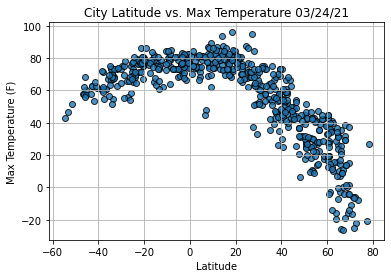

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

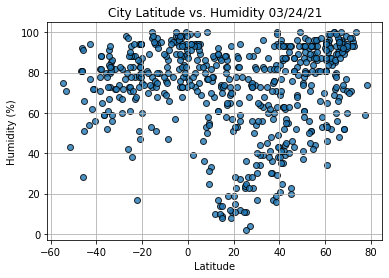

In [15]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

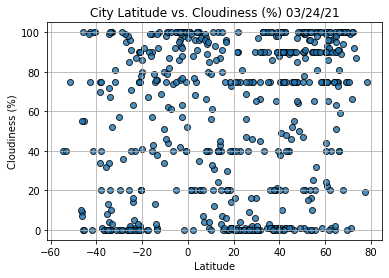

In [16]:
# Build the scatter plots for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

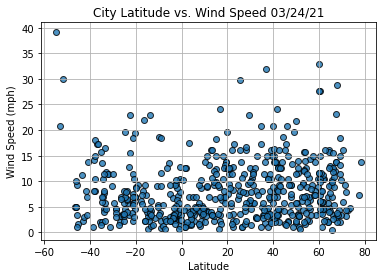

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()